In [33]:
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load dataset into dataframe
df = pd.read_csv('data/Ecommerce_Customers.csv') 


In [8]:
# Examine dataframe info and stats
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB
None
       Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822  

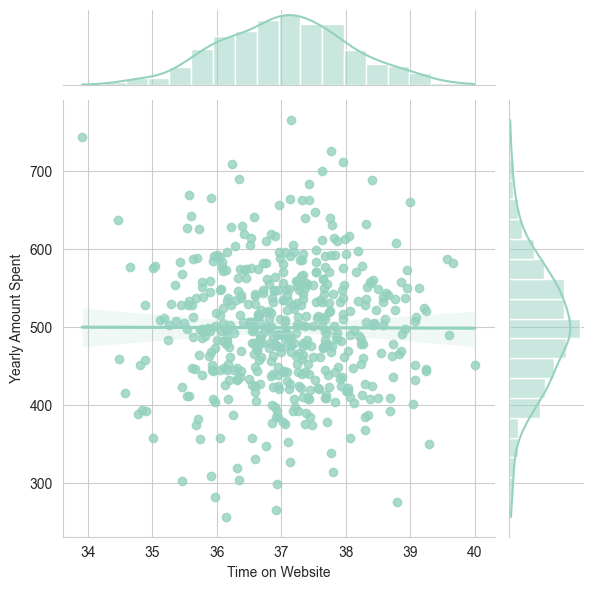

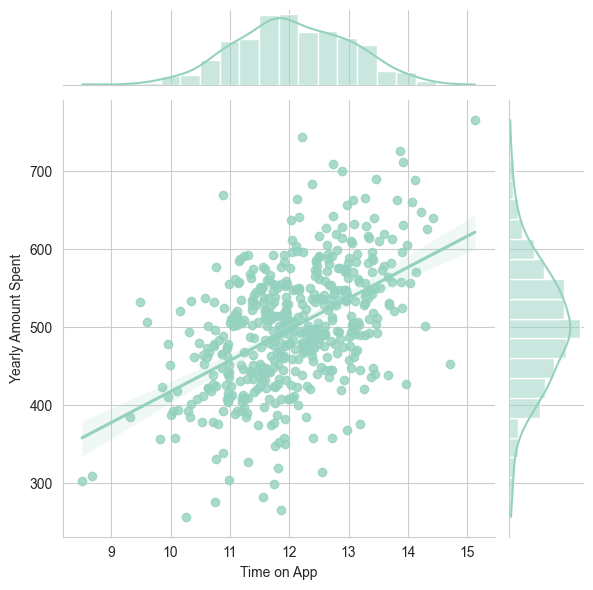

In [61]:
# Set style and palette
sns.set_style('whitegrid')
sns.set_palette('GnBu_d')

# Create jointplot for Yearly Amount Spent vs Time on Website
sns.jointplot(data=df, x='Time on Website', y='Yearly Amount Spent', kind='reg')

# Create jointplot for Yearly Amount Spent vs Time on App 
sns.jointplot(data=df, x='Time on App', y='Yearly Amount Spent', kind='reg')

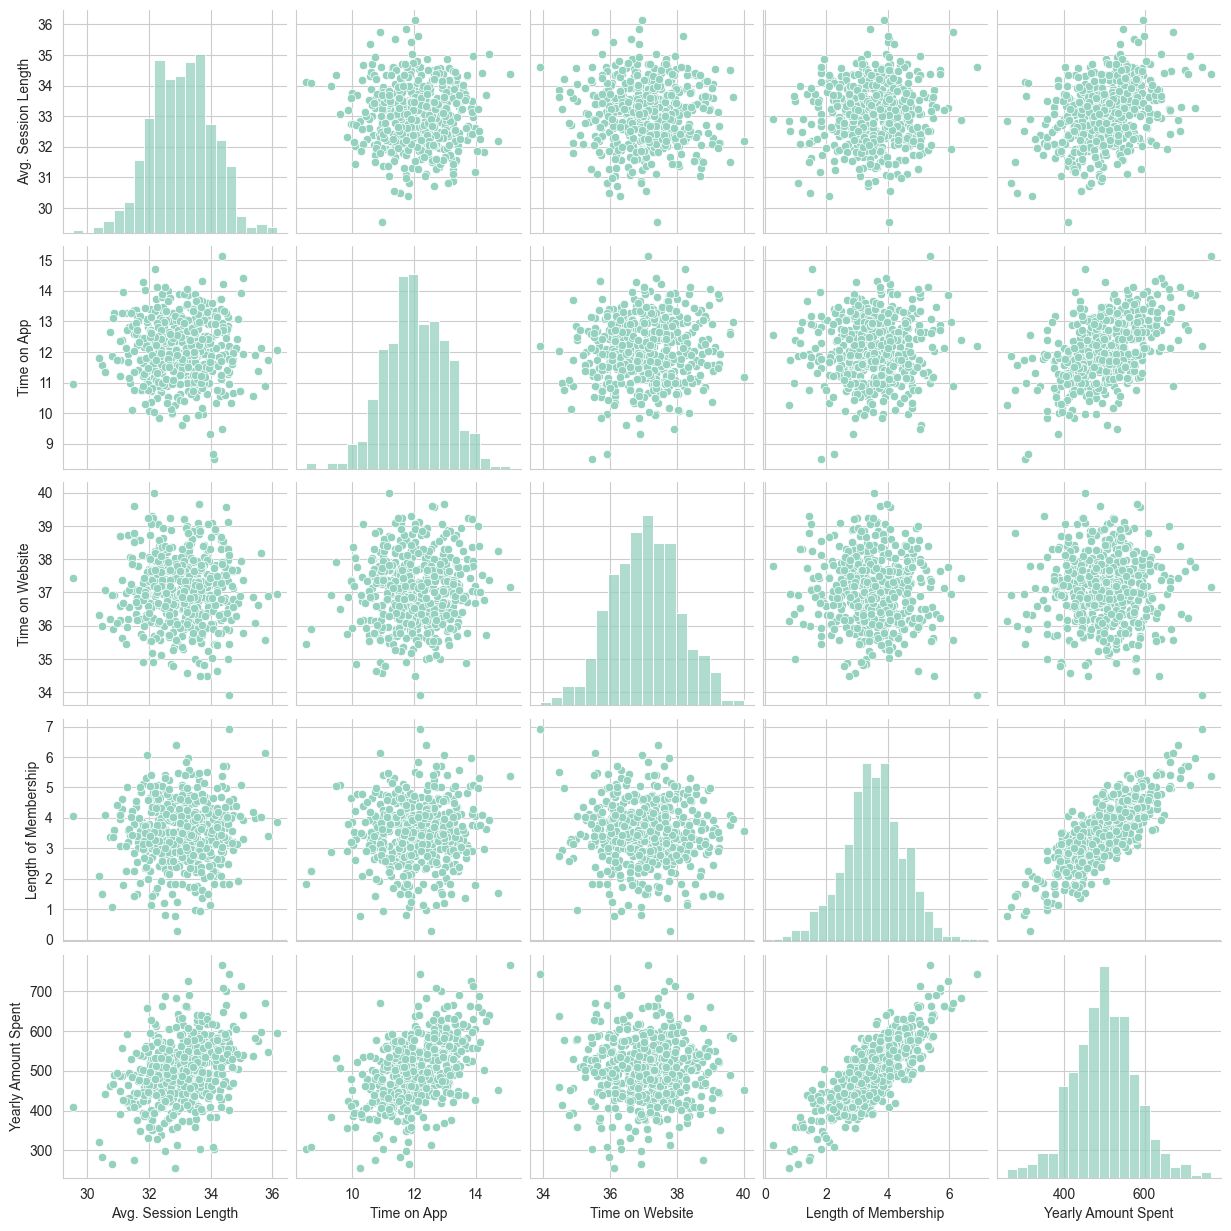

In [55]:
# Create pairplot 
sns.pairplot(df)

In [46]:
# Separate features and target
X = df.drop(['Yearly Amount Spent', 'Address', 'Avatar', 'Email'], axis=1)  # Drop Object columns because they dont help us
y = df['Yearly Amount Spent']


# Normalize features
scaler = MinMaxScaler() 
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101) 

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)


Text(0, 0.5, 'Predicted')

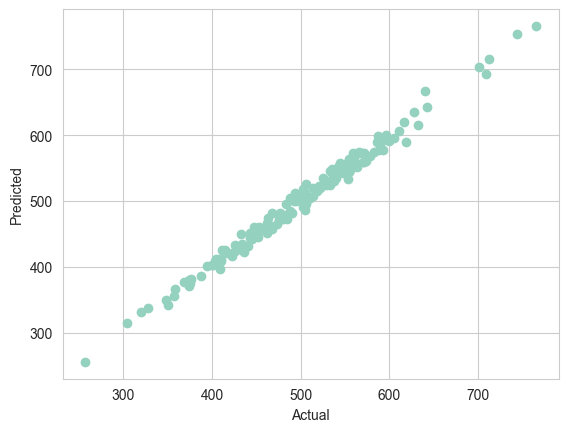

In [56]:
# Plot scatter of actual vs predicted
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')


In [49]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)  
rmse = np.sqrt(mse)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)

MAE: 7.228148653430837
MSE: 79.81305165097469
RMSE: 8.933815066978648


Text(0.5, 0, 'Residuals')

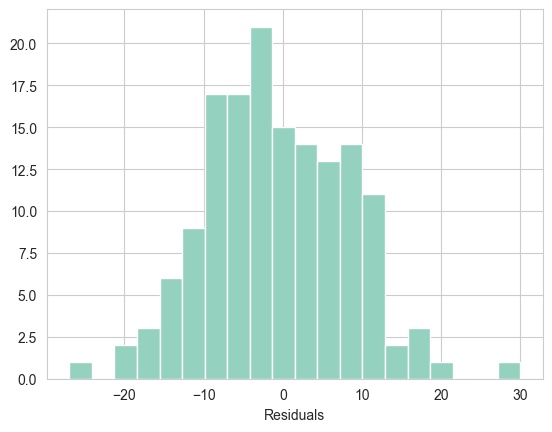

In [60]:
# Plot histogram of residuals
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')

In [51]:

# Print model coefficients
print(model.coef_)

#[25.98154972 38.59015875  0.19040528 61.27909654]   without normalization
#[171.66616628 255.42216789   1.15982222 407.67685316]    with normalization

[171.66616628 255.42216789   1.15982222 407.67685316]
